In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
implicit = pd.read_csv('data/implicit_ratings.csv')
books = pd.read_csv('data/books.csv')
users = pd.read_csv('data/users.csv')
ratings = pd.read_csv('data/book_ratings_train.csv')

In [3]:
print(implicit.shape)
print(books.shape)
print(users.shape)
print(ratings.shape)

(716109, 3)
(271379, 9)
(278858, 3)
(260202, 3)


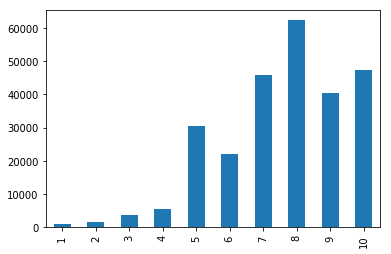

In [4]:
ratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')

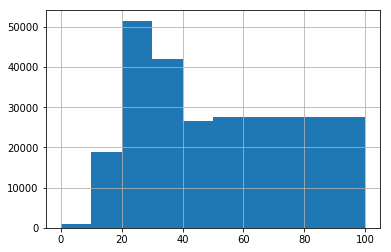

In [5]:
users['Age'].hist(bins=[0,10,20,30,40,50,100])

In [6]:
rating_cnt = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
rating_cnt.sort_values('Book-Rating', ascending=False).index[:6].values

array(['0316666343', '0971880107', '0385504209', '0312195516',
       '0679781587', '0060928336'], dtype=object)

In [7]:
most_rated_books = pd.DataFrame(rating_cnt.sort_values('Book-Rating', ascending=False).index[:6].values, columns=['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Description
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,"When we first meet 14-year-old Susie Salmon, s..."
1,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,"After graduating from college, Sam Altman find..."
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,"While in Paris on business, Harvard symbologis..."
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,"Her name is Dinah. In the Bible, her life is o..."
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,"When Siddalee Walker, oldest daughter of Vivi ..."


In [8]:
avg_rating = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].mean())
avg_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
avg_rating.sort_values('ratingCount', ascending=False).head()

,Book-Rating,ratingCount
ISBN,,
0316666343,8.216152,421
0971880107,4.448468,359
0385504209,8.360927,302
0312195516,8.184211,228
0679781587,8.359606,203


In [9]:
counts1 = ratings['User-ID'].value_counts()
print(len(counts1))
ratings = ratings[ratings['User-ID'].isin(counts1[counts1 >= 100].index)]
print(len(ratings))

57758
49385


In [10]:
ratings_pivot = ratings.pivot(index='User-ID', columns='ISBN')['Book-Rating']
userID = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(215, 39712)


ISBN,0*708880258,0000000000,0000000000000,0000000051,0000913154,0001047213,0001048082,000105337X,0001053736,0001053744,...,ISBN068481039,N006485332,N3612250612,O316666343,O425126064,O590418262,O67174142X,O9088446X,X000000000,"\2842053052\"""""
User-ID,,,,,,,,,,,,,,,,,,,,,
003f563f91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01df48e4ad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01ef67e10b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0439e0f7d2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
072e554a0d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
bones_ratings = ratings_pivot['0316666343']
similar_to_bones = ratings_pivot.corrwith(bones_ratings)
corr_bones = pd.DataFrame(similar_to_bones, columns = ['personR'])
corr_bones.dropna(inplace=True)
corr_summary = corr_bones.join(avg_rating['ratingCount'])
corr_summary[corr_summary['ratingCount'] >= 100].sort_values('personR', ascending=False).head(20)

/nfs/Sif/chipcheng/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/nfs/Sif/chipcheng/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


,personR,ratingCount
ISBN,,
0060930535,1.000000,126
0316666343,1.000000,421
0140293248,1.000000,109
0345342968,1.000000,103
0345361792,1.000000,120
0439064872,1.000000,121
0671003755,0.852803,113
0786868716,0.577350,153
0345370775,0.000000,124


KNN

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

implicit = pd.read_csv('data/implicit_ratings.csv')
books = pd.read_csv('data/books.csv')
users = pd.read_csv('data/users.csv')
ratings = pd.read_csv('data/book_ratings_train.csv')

In [3]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['Year-Of-Publication','Publisher','Image-URL-S','Image-URL-M','Image-URL-L','Book-Description','Book-Author']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,153d612c88,1550372289,8,Hide and Sneak
1,f73f18a13a,030796017X,10,Just Say Please (Mercer Mayer's Little Critter...
2,be36e5b8cb,0345413350,10,"The Golden Compass (His Dark Materials, Book 1)"
3,21fcd6de35,0345413350,9,"The Golden Compass (His Dark Materials, Book 1)"
4,72e5c801f6,0345413350,10,"The Golden Compass (His Dark Materials, Book 1)"


In [4]:
combine_book_rating = combine_book_rating.dropna(axis=0, subset=['Book-Title'])
book_ratingCount = (combine_book_rating.\
                    groupby(by=['ISBN'])['Book-Rating'].count().reset_index()\
                    .rename(columns={'Book-Rating':'totalRatingCount'})\
                    [['ISBN', 'totalRatingCount']])
book_ratingCount.head()

,ISBN,totalRatingCount
0,0000913154,1
1,0001047213,1
2,0001047973,1
3,000104799X,1
4,0001048082,2


In [5]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on='ISBN'
                                                         , right_on='ISBN', how='left')

rating_with_totalRatingCount['totalRatingCount'].describe()

count    230287.000000
mean         15.188660
std          36.291027
min           1.000000
25%           1.000000
50%           3.000000
75%          12.000000
max         421.000000
Name: totalRatingCount, dtype: float64

In [6]:
rating_with_totalRatingCount.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount
0,153d612c88,1550372289,8,Hide and Sneak,1
1,f73f18a13a,030796017X,10,Just Say Please (Mercer Mayer's Little Critter...,1
2,be36e5b8cb,0345413350,10,"The Golden Compass (His Dark Materials, Book 1)",51
3,21fcd6de35,0345413350,9,"The Golden Compass (His Dark Materials, Book 1)",51
4,72e5c801f6,0345413350,10,"The Golden Compass (His Dark Materials, Book 1)",51


In [7]:
rating_with_totalRatingCount['totalRatingCount'].quantile(np.arange(.9,1,.01))

0.90     39.0
0.91     43.0
0.92     49.0
0.93     55.0
0.94     63.0
0.95     71.0
0.96     84.0
0.97     99.0
0.98    129.0
0.99    168.0
Name: totalRatingCount, dtype: float64

In [8]:
popularity_threshold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount
2,be36e5b8cb,0345413350,10,"The Golden Compass (His Dark Materials, Book 1)",51
3,21fcd6de35,0345413350,9,"The Golden Compass (His Dark Materials, Book 1)",51
4,72e5c801f6,0345413350,10,"The Golden Compass (His Dark Materials, Book 1)",51
5,fb7369264a,0345413350,8,"The Golden Compass (His Dark Materials, Book 1)",51
6,e484b5c4ba,0345413350,8,"The Golden Compass (His Dark Materials, Book 1)",51


In [9]:
combined = rating_popular_book.merge(users, left_on='User-ID', right_on = 'User-ID', how = 'left')
combined.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount,Location,Age
0,be36e5b8cb,0345413350,10,"The Golden Compass (His Dark Materials, Book 1)",51,"rochester, new york, usa",NaN
1,21fcd6de35,0345413350,9,"The Golden Compass (His Dark Materials, Book 1)",51,"englewood, colorado, usa",35.0
2,72e5c801f6,0345413350,10,"The Golden Compass (His Dark Materials, Book 1)",51,"orlando, florida, usa",26.0
3,fb7369264a,0345413350,8,"The Golden Compass (His Dark Materials, Book 1)",51,"amsterdam, n/a, netherlands",51.0
4,e484b5c4ba,0345413350,8,"The Golden Compass (His Dark Materials, Book 1)",51,"seoul, s.k., south korea",34.0


In [10]:
us_canada_user_rating = combined[combined['Location'].str.contains('usa|canada')]
us_canada_user_rating = us_canada_user_rating.drop('Age', axis = 1)
us_canada_user_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,totalRatingCount,Location
0,be36e5b8cb,0345413350,10,"The Golden Compass (His Dark Materials, Book 1)",51,"rochester, new york, usa"
1,21fcd6de35,0345413350,9,"The Golden Compass (His Dark Materials, Book 1)",51,"englewood, colorado, usa"
2,72e5c801f6,0345413350,10,"The Golden Compass (His Dark Materials, Book 1)",51,"orlando, florida, usa"
6,c4d30b73c3,0345413350,7,"The Golden Compass (His Dark Materials, Book 1)",51,"sturgis, michigan, usa"
7,04e85bdce7,0345413350,3,"The Golden Compass (His Dark Materials, Book 1)",51,"bristow, virginia, usa"


In [11]:
from scipy.sparse import csr_matrix
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index='ISBN', columns = 'User-ID', values = 'Book-Rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)
us_canada_user_rating_matrix.shape

(216, 9171)

In [23]:
from sklearn.neighbors import NearestNeighbors
model_knn= NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [24]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].reshape(1,-1), n_neighbors=6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        isbn = us_canada_user_rating_pivot.index[indices.flatten()[i]]
        print('{0}:{1}:{2}, with d = {3}'.format(i, isbn, books.loc[books['ISBN'] == isbn]['Book-Title'].values, distances.flatten()[i]))
        

Recommendations for 0385722206

1:0312305060:['The Hours: A Novel'], with d = 0.9167408079464353
2:0142001430:['Year of Wonders'], with d = 0.9274489999968885
3:0312195516:['The Red Tent (Bestselling Backlist)'], with d = 0.9285201804097487
4:038079487X:['What Looks Like Crazy On An Ordinary Day'], with d = 0.9331538132561366
5:1400031354:['Tears of the Giraffe (No.1 Ladies Detective Agency)'], with d = 0.9355797037300542


/nfs/Sif/chipcheng/miniconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


In [21]:
a = np.array([[1,2,0],[3,4,5]])
pd.DataFrame(a, index=['xx','yy'], columns=['111', '222','333'])

,111,222,333
xx,1,2,0
yy,3,4,5


In [29]:
br_test = pd.read_csv(open('data/book_ratings_test.csv'))

In [34]:
br_test['Book-Rating'] = [0]*len(br_test)
br_test.head()

,User-ID,ISBN,Book-Rating
0,27b250f951,1560232234,0
1,23eaeeebcf,0156027321,0
2,cf504ef35f,0761526544,0
3,4bddaabbca,0451169514,0
4,d630830673,0070329559,0


In [35]:
pd.concat([ratings, br_test])

,User-ID,ISBN,Book-Rating
0,27b250f951,1560232234,0
1,23eaeeebcf,0156027321,0
2,cf504ef35f,0761526544,0
3,4bddaabbca,0451169514,0
4,d630830673,0070329559,0
5,b9a30c02c8,0517618338,0
6,e748a17462,0849940273,0
7,464e3938e6,0671749897,0
8,f58538d782,0375725466,0
9,4b9a415a4f,0373510055,0
